# Notebook For Generation of a partially-synthetic dataset for roughness detection

As I write this, on June 27th, the University of Minnesota - Twin Cities' Summer Undergraduate Research Expo, a research symposium for undergraduates and some select high schoolers is around a month and some change away. One of the most central parts of our device's design is based on a Computer-Vision-based appproach to Texture Analyis, taking images of a surface and then using Image Feature Extraction techniques(or potentially in the future -- if enough data is obtained -- a Convolutional Neural Network) and a traditional Machine Learning Regression model to determine the roughness of a surface on a scale of 1-10.

However, obtaining this data is incredibly challening and often requires large surveys which are both time-consuming to distribute. but are also prone to error(likely just as much error as the technique used here). Thus, throughout this journal we explore a method of using Gemini fine-tuning in order to create synthetically rated data in order to somewhat accurately train our Computer Vision Texture-Analyisis Model

In [2]:
import pandas as pd
import json
import matplotlib
import os
import sys

file_path = "../img_feature_analysis.py"
module_dir = os.path.dirname(file_path)

sys.path.append(module_dir)

import img_feature_analysis

In [3]:
with open("../data/RRS_Survey.json") as js:
    rrs_dict = json.load(js)
rrs_dict

{'list': [{'index': 0,
   'Bark.jpg': 1,
   'Wall(4).jpg': 2,
   'Leather chair.jpg': 3,
   'Skin.png': 4,
   'Skin(1).jpg': 5,
   'timestamp': '2025-05-20 05:04:34.483005',
   'name': '',
   'gender': 'Male'},
  {'index': 1,
   'Clay sculpture_.jpg': 4,
   'Whiteboard.jpg': 1,
   'Wooden sign.jpg': 2,
   'Rock.jpg': 5,
   'Wall(5).jpg': 3,
   'timestamp': '2025-05-20 05:07:05.432513',
   'name': 'Arianna Lam',
   'gender': 'Female'},
  {'index': 2,
   'Wall(5).jpg': 5,
   'Stuffed animal fabric.jpg': 1,
   'Wooden sign.jpg': 4,
   'Rope.jpg': 2,
   'Styrofoam_.jpg': 3,
   'timestamp': '2025-05-20 11:11:10.468182',
   'name': 'Victoria Wysocki ',
   'gender': 'Female'},
  {'index': 3,
   'Pavement_.jpg': 5,
   'Weave bag(1).jpg': 3,
   'Towel(1).jpg': 2,
   'Whiteboard.jpg': 1,
   'Wall(5).jpg': 4,
   'timestamp': '2025-05-20 11:30:23.112832',
   'name': 'Katelyn',
   'gender': 'Female'},
  {'index': 4,
   'Styrofoam_.jpg': 2,
   'Table(1).jpg': 4,
   'Sidewalk.jpg': 5,
   'Skin.png': 

In [4]:
pd.read_json("../data/RRS_Survey.json")

,list
0,"{'index': 0, 'Bark.jpg': 1, 'Wall(4).jpg': 2, ..."
1,"{'index': 1, 'Clay sculpture_.jpg': 4, 'Whiteb..."
2,"{'index': 2, 'Wall(5).jpg': 5, 'Stuffed animal..."
3,"{'index': 3, 'Pavement_.jpg': 5, 'Weave bag(1)..."
4,"{'index': 4, 'Styrofoam_.jpg': 2, 'Table(1).jp..."
...,...
85,"{'index': 85, 'Wall(4).jpg': 3, 'Wood.jpg': 2,..."
86,"{'index': 86, 'Wooden sign.jpg': 3, 'Rock.jpg'..."
87,"{'index': 87, 'Bed headboard fabric_.jpg': 2, ..."
88,"{'index': 88, 'Leather chair.jpg': 3, 'Paper.j..."


During the released version of this notebook and the surrounding software as GitHub repository, it's important to note that the original .csv file will not be available and that only an anonymized version will be present to prevent the unnecessary leakage of Personal Information within this paper.Below indicates the process of this personal information being removed.

In [5]:
#Setting rrs_dict to the contents of the 'list' section of the json which includes all of the important data
rrs_dict = rrs_dict['list']

In [6]:
#Removing Name, Gender, & Timestamp

for item in rrs_dict:
    item.pop('name')
    item.pop('timestamp')
    item.pop('gender')
rrs_dict

[{'index': 0,
  'Bark.jpg': 1,
  'Wall(4).jpg': 2,
  'Leather chair.jpg': 3,
  'Skin.png': 4,
  'Skin(1).jpg': 5},
 {'index': 1,
  'Clay sculpture_.jpg': 4,
  'Whiteboard.jpg': 1,
  'Wooden sign.jpg': 2,
  'Rock.jpg': 5,
  'Wall(5).jpg': 3},
 {'index': 2,
  'Wall(5).jpg': 5,
  'Stuffed animal fabric.jpg': 1,
  'Wooden sign.jpg': 4,
  'Rope.jpg': 2,
  'Styrofoam_.jpg': 3},
 {'index': 3,
  'Pavement_.jpg': 5,
  'Weave bag(1).jpg': 3,
  'Towel(1).jpg': 2,
  'Whiteboard.jpg': 1,
  'Wall(5).jpg': 4},
 {'index': 4,
  'Styrofoam_.jpg': 2,
  'Table(1).jpg': 4,
  'Sidewalk.jpg': 5,
  'Skin.png': 1,
  'Pavement.jpg': 3},
 {'index': 5,
  'Clay sculpture_.jpg': 5,
  'Wall(5).jpg': 4,
  'Wall(1).jpg': 3,
  'Bedsheets_.jpg': 1,
  'Fabric.jpg': 2},
 {'index': 6,
  'Wall(4).jpg': 2,
  'Fan vent.jpg': 5,
  'Fan vent(1).jpg': 4,
  'Rope.jpg': 1,
  'Towel.jpg': 3},
 {'index': 7,
  'Wooden sign.jpg': 2,
  'Hair(2).jpg': 3,
  'Skin(1).jpg': 1,
  'Fan vent(1).jpg': 4,
  'Towel.jpg': 5},
 {'index': 8,
  'Roc

In [7]:
#Saving to JSON file in ../data folder
with open("../data/Anonymized_Relative_Roughness_Survey_Results.json","w") as f:
        f.write(json.dumps(rrs_dict))

## Exploratory Data Analysis 

In order to represent the data collected, which is in a somewhat unique format, I believe it's best to represent this using a data structure like a HashMap, where each value represents another value, and there can only be one of each key. In this case it would be in the type of format of a Map<Tuple, int> type of situation where the Tuple represents the first and second image(_Although this would need me to figure out a method of ordering them so the keys are consistent_) and the integer from [-1,1] represents which of the two is more rough, where in a -1 would mean all votes said the first image was rougher and a 1 means the second image was roguher, while a 0 means an equal amount voted the first as rougher as the second being rougher.

In [8]:
# Create a 'map'(really just a dictionary) which will store each of the ratings with a key being a tuple and the value being [-1,1]
# as previously explained above
#As I later discovered to make this algorithm work it should also store the individual votes
ratings_map = {}
#Method sorts tuples so that they are in alphabetical order to ensure each key matches exactly to one set of ratings.
#Also returns None when they are the exact
def sort_tuple(input_tuple:tuple):
    if input_tuple[0] == input_tuple[1]:
        return None
    if input_tuple[0]>input_tuple[1]:
        return (input_tuple[1],input_tuple[0])
    return input_tuple

In [9]:
#Sequentially going through each item in rrs_dict and then matching each one with one of the images after it in the list

for result in rrs_dict: #iterate through each survey result
    for i, key_i in  enumerate(result.keys()): #iterate through each specific image except the last one, since al images will have already have been matched with it
        for j, key_j in enumerate(result.keys()): #iterate through and match current image with other images, O(n!) algorithm
            if j <= i:
                continue
            image_tuple =  sort_tuple((key_i,key_j))
            if image_tuple is None:
                continue
            if image_tuple not in ratings_map:
                ratings_map[image_tuple] = {'results':[]}
            difference: int

            if(result[image_tuple[0]] - result[image_tuple[1]] > 0 ):
                difference = -1
            else:
                difference = 1
            ratings_map[image_tuple]['results'].append(difference)
            


In [10]:

print(len(ratings_map))

ratings_map


685


{('Bark.jpg', 'index'): {'results': [-1, 1, 1, 1, 1, 1, 1]},
 ('Wall(4).jpg', 'index'): {'results': [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
 ('Leather chair.jpg',
  'index'): {'results': [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
 ('Skin.png', 'index'): {'results': [-1, 1, 1]},
 ('Skin(1).jpg', 'index'): {'results': [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
 ('Bark.jpg', 'Wall(4).jpg'): {'results': [1]},
 ('Bark.jpg', 'Leather chair.jpg'): {'results': [1, -1, -1]},
 ('Bark.jpg', 'Skin.png'): {'results': [1]},
 ('Bark.jpg', 'Skin(1).jpg'): {'results': [1, -1]},
 ('Leather chair.jpg', 'Wall(4).jpg'): {'results': [-1]},
 ('Skin.png', 'Wall(4).jpg'): {'results': [-1]},
 ('Skin(1).jpg', 'Wall(4).jpg'): {'results': [-1, 1, 1]},
 ('Leather chair.jpg', 'Skin.png'): {'results': [1]},
 ('Leather chair.jpg', 'Skin(1).jpg'): {'results': [1, -1]},
 ('Skin(1).jpg', 'Skin.png'): {'results': [-1]},
 ('Clay sculpture_.jpg', 'index'): {'results': [-1, 1, 1, 1, 1, 1]},
 ('Whiteboard.jpg', 'index'): {'results': [1, 

In [11]:
for pair in ratings_map:
    sum = 0
    for result in ratings_map[pair]['results']:
        sum +=  result
        if(len(ratings_map[pair]['results']) == 0):
            ratings_map[pair]['avg'] = 0
            continue    
        ratings_map[pair]['avg'] = sum/len(ratings_map[pair]['results'])

In [12]:
ratings_map

{('Bark.jpg', 'index'): {'results': [-1, 1, 1, 1, 1, 1, 1],
  'avg': 0.7142857142857143},
 ('Wall(4).jpg', 'index'): {'results': [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'avg': 0.8181818181818182},
 ('Leather chair.jpg',
  'index'): {'results': [-1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1], 'avg': 0.8181818181818182},
 ('Skin.png', 'index'): {'results': [-1, 1, 1], 'avg': 0.3333333333333333},
 ('Skin(1).jpg', 'index'): {'results': [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'avg': 0.8333333333333334},
 ('Bark.jpg', 'Wall(4).jpg'): {'results': [1], 'avg': 1.0},
 ('Bark.jpg', 'Leather chair.jpg'): {'results': [1, -1, -1],
  'avg': -0.3333333333333333},
 ('Bark.jpg', 'Skin.png'): {'results': [1], 'avg': 1.0},
 ('Bark.jpg', 'Skin(1).jpg'): {'results': [1, -1], 'avg': 0.0},
 ('Leather chair.jpg', 'Wall(4).jpg'): {'results': [-1], 'avg': -1.0},
 ('Skin.png', 'Wall(4).jpg'): {'results': [-1], 'avg': -1.0},
 ('Skin(1).jpg', 'Wall(4).jpg'): {'results': [-1, 1, 1],
  'avg': 0.333333

In [13]:
from collections import Counter

# Get the length of the results list for each pair
lengths = [len(v['results']) for v in ratings_map.values()]

# Count occurrences of each length
length_counts = Counter(lengths)

# Print counts for each length from 0 to max length
for i in range(0, max(lengths)+1):
    print(f"{i}: {length_counts.get(i, 0)}")

0: 0
1: 431
2: 148
3: 41
4: 15
5: 5
6: 8
7: 6
8: 5
9: 5
10: 8
11: 4
12: 4
13: 3
14: 1
15: 1


In [14]:
len(ratings_map)

685

So at this point I've somewhat noticed an issue -- it seems that oftentimes many of these comparisons only have one rating, Increasing the chance of potential outliers which could lead to a model which may be incorrectly finetuned and doesn't accurately represent how  most humans would rate the images; however removing those with only rating would result in the removal of well near around 63% of the data which would be lost. If I were to remove those with only 2 votes too since they are also similarly very vulnerable to outliers in responses, it may make more than  84.5% of all data unusable. Either way another method needs to be selected - I'm thinking that I can try and graph $ AvgRating$  vs. $\Delta GLCM Contrast$ and  $\Delta GLCM Entropy$ and see how well they correlate

It is also from this moment onwards that I will make a brief breakaway python script/library in order to do image feature analysis using skimage

In [15]:
#Testing to ensure that I can access the library from this notebook
from img_feature_analysis import img_feature_analysis
img_feature_analysis.calculate_glcm_feature('../High_Contrast.png','entropy')

1.3873942901334888

Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'


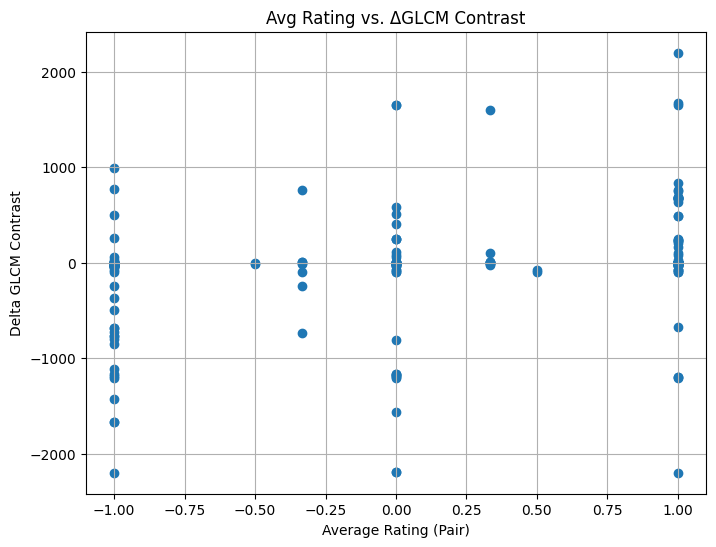

In [16]:
import matplotlib.pyplot as plt

# Prepare data for plotting
x = []
y = []

for pair, data in ratings_map.items():
    avg_result = data.get('avg')
    if len(data.get('results')) <2:
        continue
    # Calculate delta GLCM contrast using img_feature_analysis
    
    contrast1 = img_feature_analysis.calculate_glcm_feature('../data/RRS_Sample_Images/' + pair[0], 'contrast')
    contrast2 = img_feature_analysis.calculate_glcm_feature('../data/RRS_Sample_Images/' + pair[1], 'contrast')
    if contrast1 is None or contrast2 is None:
        continue  # Skip this pair if either contrast value is None
    delta_contrast = contrast2 - contrast1

    x.append(avg_result)
    y.append(delta_contrast)

plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel('Average Rating (Pair)')
plt.ylabel('Delta GLCM Contrast')
plt.title('Avg Rating vs. ΔGLCM Contrast')
plt.grid(True)
plt.show()

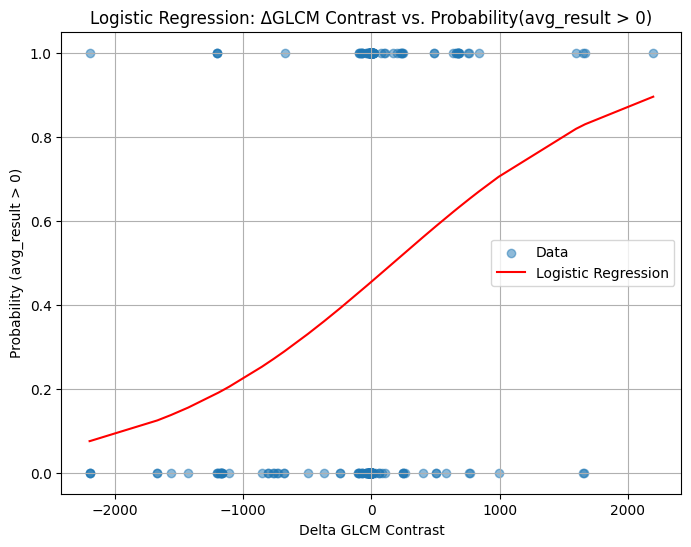

RMSE: 0.4757


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare data for logistic regression
X = np.array(y).reshape(-1, 1)  # delta_contrast as feature
y_true = np.array(x)            # avg_result as target

# Since avg_result is continuous, let's binarize it for logistic regression
# We'll use 1 if avg_result > 0, else 0
y_bin = (y_true > 0).astype(int)

# Fit logistic regression
logreg = LogisticRegression()
logreg.fit(X, y_bin)

# Predict probabilities
y_pred_prob = logreg.predict_proba(X)[:, 1]

# Plot logistic regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y_bin, label='Data', alpha=0.5)
plt.plot(np.sort(X[:, 0]), logreg.predict_proba(np.sort(X, axis=0))[:, 1], color='red', label='Logistic Regression')
plt.xlabel('Delta GLCM Contrast')
plt.ylabel('Probability (avg_result > 0)')
plt.title('Logistic Regression: ΔGLCM Contrast vs. Probability(avg_result > 0)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_bin, y_pred_prob))
print(f"RMSE: {rmse:.4f}")

Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'


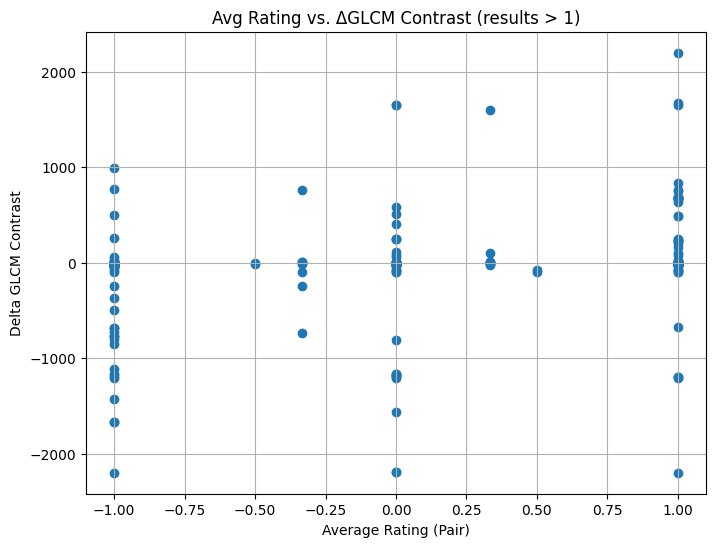

In [18]:
# Filter data to only include pairs where len(results) > 1
x_filtered = []
y_filtered = []

for pair, data in ratings_map.items():
    if len(data.get('results', [])) > 1:
        avg_result = data.get('avg')
        contrast1 = img_feature_analysis.calculate_glcm_feature('../data/RRS_Sample_Images/' + pair[0], 'contrast')
        contrast2 = img_feature_analysis.calculate_glcm_feature('../data/RRS_Sample_Images/' + pair[1], 'contrast')
        if contrast1 is None or contrast2 is None:
            continue
        delta_contrast = contrast2 - contrast1
        x_filtered.append(avg_result)
        y_filtered.append(delta_contrast)

plt.figure(figsize=(8, 6))
plt.scatter(x_filtered, y_filtered)
plt.xlabel('Average Rating (Pair)')
plt.ylabel('Delta GLCM Contrast')
plt.title('Avg Rating vs. ΔGLCM Contrast (results > 1)')
plt.grid(True)
plt.show()

Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'


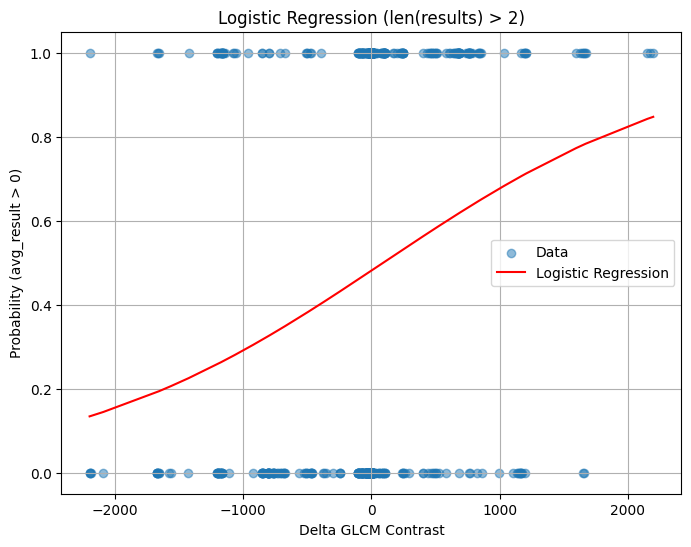

RMSE (filtered): 0.4852


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Filter data to only include pairs where len(results) > 2
x_logistic = []
y_logistic = []

for pair, data in ratings_map.items():
    if len(data.get('results', [])) > 0:
        avg_result = data.get('avg')
        contrast1 = img_feature_analysis.calculate_glcm_feature('../data/RRS_Sample_Images/' + pair[0], 'contrast')
        contrast2 = img_feature_analysis.calculate_glcm_feature('../data/RRS_Sample_Images/' + pair[1], 'contrast')
        if contrast1 is None or contrast2 is None:
            continue
        delta_contrast = contrast2 - contrast1
        x_logistic.append(avg_result)
        y_logistic.append(delta_contrast)

X_logistic = np.array(y_logistic).reshape(-1, 1)
y_true_logistic = np.array(x_logistic)
y_bin_logistic = (y_true_logistic > 0).astype(int)

logreg_filtered = LogisticRegression()
logreg_filtered.fit(X_logistic, y_bin_logistic)

y_pred_prob_filtered = logreg_filtered.predict_proba(X_logistic)[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(X_logistic, y_bin_logistic, label='Data', alpha=0.5)
plt.plot(np.sort(X_logistic[:, 0]), logreg_filtered.predict_proba(np.sort(X_logistic, axis=0))[:, 1], color='red', label='Logistic Regression')
plt.xlabel('Delta GLCM Contrast')
plt.ylabel('Probability (avg_result > 0)')
plt.title('Logistic Regression (len(results) > 2)')
plt.legend()
plt.grid(True)
plt.show()

rmse_filtered = np.sqrt(mean_squared_error(y_bin_logistic, y_pred_prob_filtered))
print(f"RMSE (filtered): {rmse_filtered:.4f}")

Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'


C:\Users\ndian\AppData\Local\Temp\ipykernel_29440\2535504100.py:7: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k*(x-x0))) + b


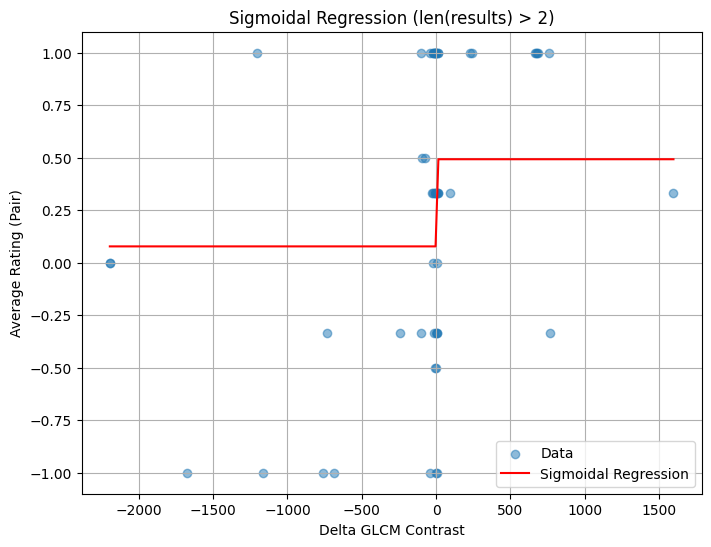

In [20]:
from scipy.optimize import curve_fit
import numpy as np

import matplotlib.pyplot as plt

def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k*(x-x0))) + b

def plot_sigmoidal_regression(min_results=2):
    # Filter data based on min_results
    x_sigmoid = []
    y_sigmoid = []
    for pair, data in ratings_map.items():
        if len(data.get('results', [])) > min_results:
            avg_result = data.get('avg')
            contrast1 = img_feature_analysis.calculate_glcm_feature('../data/RRS_Sample_Images/' + pair[0], 'contrast')
            contrast2 = img_feature_analysis.calculate_glcm_feature('../data/RRS_Sample_Images/' + pair[1], 'contrast')
            if contrast1 is None or contrast2 is None:
                continue
            delta_contrast = contrast2 - contrast1
            x_sigmoid.append(avg_result)
            y_sigmoid.append(delta_contrast)

    x_sigmoid = np.array(x_sigmoid)
    y_sigmoid = np.array(y_sigmoid)

    # Fit sigmoid curve
    p0 = [max(x_sigmoid)-min(x_sigmoid), np.median(x_sigmoid), 1, min(x_sigmoid)]
    try:
        popt, _ = curve_fit(sigmoid, y_sigmoid, x_sigmoid, p0, maxfev=10000)
    except RuntimeError:
        print("Sigmoid fit did not converge.")
        return

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_sigmoid, x_sigmoid, label='Data', alpha=0.5)
    x_fit = np.linspace(min(y_sigmoid), max(y_sigmoid), 200)
    plt.plot(x_fit, sigmoid(x_fit, *popt), color='red', label='Sigmoidal Regression')
    plt.xlabel('Delta GLCM Contrast')
    plt.ylabel('Average Rating (Pair)')
    plt.title(f'Sigmoidal Regression (len(results) > {min_results})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_sigmoidal_regression(min_results=2)

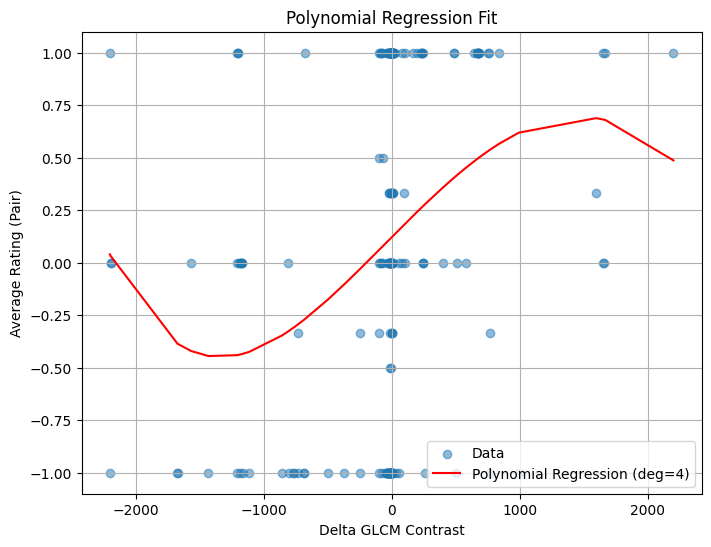

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Fit polynomial regression (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(np.array(y_filtered).reshape(-1, 1))
model = LinearRegression()
model.fit(X_poly, np.array(x_filtered))

# Predict and plot
y_pred_poly = model.predict(X_poly)

plt.figure(figsize=(8, 6))
plt.scatter(y_filtered, x_filtered, label='Data', alpha=0.5)
plt.plot(np.sort(y_filtered), model.predict(poly.transform(np.sort(np.array(y_filtered)).reshape(-1, 1))), color='red', label='Polynomial Regression (deg=4)')
plt.xlabel('Delta GLCM Contrast')
plt.ylabel('Average Rating (Pair)')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'


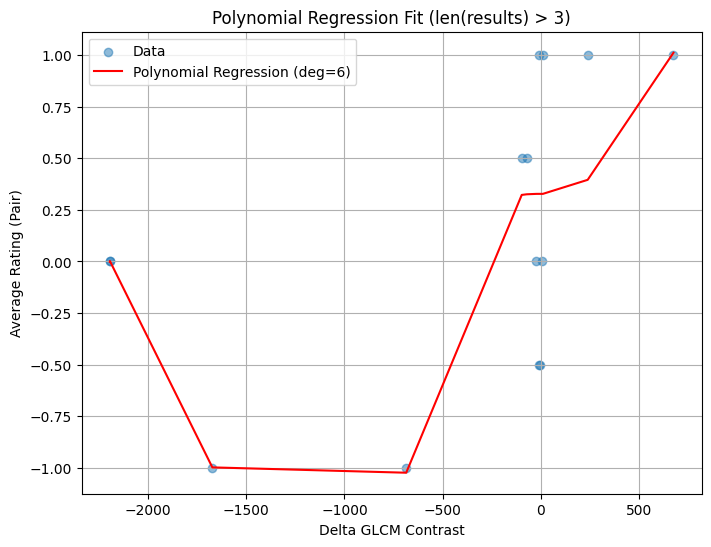

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def plot_poly_regression(min_results=2, degree=4):
    # Filter data based on min_results
    x_poly = []
    y_poly = []
    for pair, data in ratings_map.items():
        if len(data.get('results', [])) > min_results:
            avg_result = data.get('avg')
            contrast1 = img_feature_analysis.calculate_glcm_feature('../data/RRS_Sample_Images/' + pair[0], 'contrast')
            contrast2 = img_feature_analysis.calculate_glcm_feature('../data/RRS_Sample_Images/' + pair[1], 'contrast')
            if contrast1 is None or contrast2 is None:
                continue
            delta_contrast = contrast2 - contrast1
            x_poly.append(avg_result)
            y_poly.append(delta_contrast)

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(np.array(y_poly).reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, np.array(x_poly))

    # Predict and plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_poly, x_poly, label='Data', alpha=0.5)
    plt.plot(np.sort(y_poly), model.predict(poly.transform(np.sort(np.array(y_poly)).reshape(-1, 1))), color='red', label=f'Polynomial Regression (deg={degree})')
    plt.xlabel('Delta GLCM Contrast')
    plt.ylabel('Average Rating (Pair)')
    plt.title(f'Polynomial Regression Fit (len(results) > {min_results})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_poly_regression(min_results=3, degree=6)

In [24]:
# Define y_filtered_gt2 for pairs where len(results) > 2
y_filtered_gt2 = []
for pair, data in ratings_map.items():
	if len(data.get('results', [])) > 2:
		contrast1 = img_feature_analysis.calculate_glcm_feature('../data/RRS_Sample_Images/' + pair[0], 'contrast')
		contrast2 = img_feature_analysis.calculate_glcm_feature('../data/RRS_Sample_Images/' + pair[1], 'contrast')
		if contrast1 is None or contrast2 is None:
			continue
		delta_contrast = contrast2 - contrast1
		y_filtered_gt2.append(delta_contrast)


Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'


ValueError: x and y must be the same size

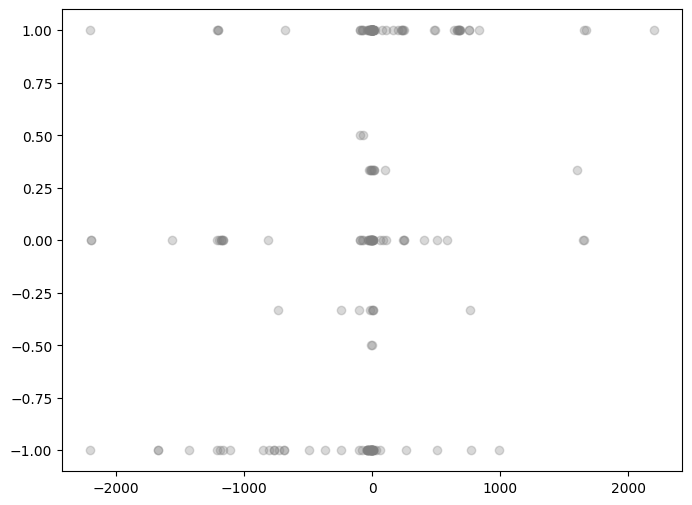

In [25]:
plt.figure(figsize=(8, 6))
# Plot all data (results > 1)
plt.scatter(y_filtered, x_filtered, label='All Data (results > 1)', alpha=0.3, color='gray')
# Overlay filtered data (results > 2)
plt.scatter(y_filtered_gt2, x_logistic, label='Filtered Data (results > 2)', alpha=0.7, color='blue')
plt.xlabel('Delta GLCM Contrast')
plt.ylabel('Average Rating (Pair)')
plt.title('Overlay: All Data vs. Filtered Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# The regression line should plot delta_contrast (x-axis) vs. predicted avg_rating (y-axis)
# Instead of plt.plot(model.predict(poly.transform(y_sorted.reshape(-1, 1))), y_sorted, ...)
# Use plt.plot(y_sorted, model.predict(poly.transform(y_sorted.reshape(-1, 1))), ...)

plt.figure(figsize=(8, 6))
plt.scatter(y_filtered, x_filtered, label='All Data', alpha=0.3, color='gray')
plt.scatter(y_filtered_gt2, x_logistic[:len(y_filtered_gt2)], label='Filtered (len(results) >= 3)', alpha=0.7, color='blue')

# Correct regression line orientation
plt.plot(y_sorted, model.predict(poly.transform(y_sorted.reshape(-1, 1))), color='red', label='Poly Fit (deg=6)')

plt.xlabel('Delta GLCM Contrast')
plt.ylabel('Average Rating (Pair)')
plt.title('GLCM Contrast Difference vs. Avg Rating with Poly Fit')
plt.legend()
plt.grid(True)
plt.show()

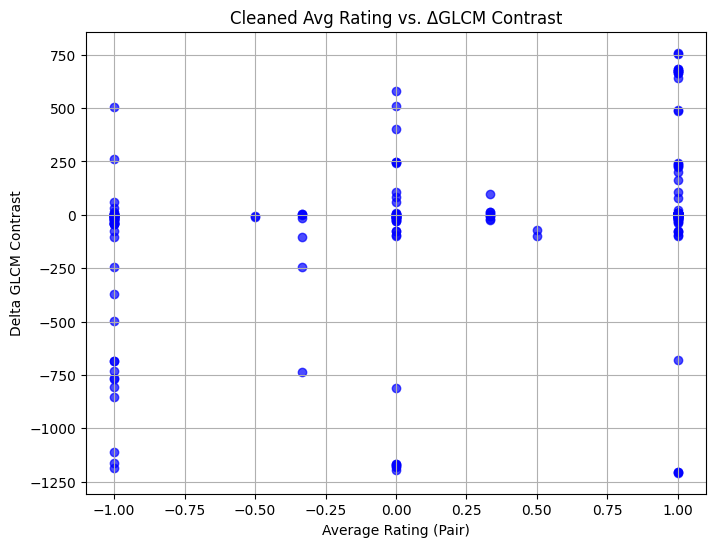

In [38]:
import numpy as np

# Clean up the data for a clearer relationship between avg_result and delta GLCM contrast

# Remove extreme outliers using percentile thresholds

# Convert to numpy arrays for easier filtering
x_arr = np.array(x_filtered)
y_arr = np.array(y_filtered)

# Define percentile thresholds (e.g., keep central 95% of data)
lower_percentile = 5
upper_percentile = 95

y_low, y_high = np.percentile(y_arr, [lower_percentile, upper_percentile])
x_low, x_high = np.percentile(x_arr, [lower_percentile, upper_percentile])

# Filter out outliers in both x and y
mask = (y_arr >= y_low) & (y_arr <= y_high) & (x_arr >= x_low) & (x_arr <= x_high)
x_clean = x_arr[mask]
y_clean = y_arr[mask]

# Plot cleaned data
plt.figure(figsize=(8, 6))
plt.scatter(x_clean, y_clean, alpha=0.7, color='blue')
plt.xlabel('Average Rating (Pair)')
plt.ylabel('Delta GLCM Contrast')
plt.title('Cleaned Avg Rating vs. ΔGLCM Contrast')
plt.grid(True)
plt.show()

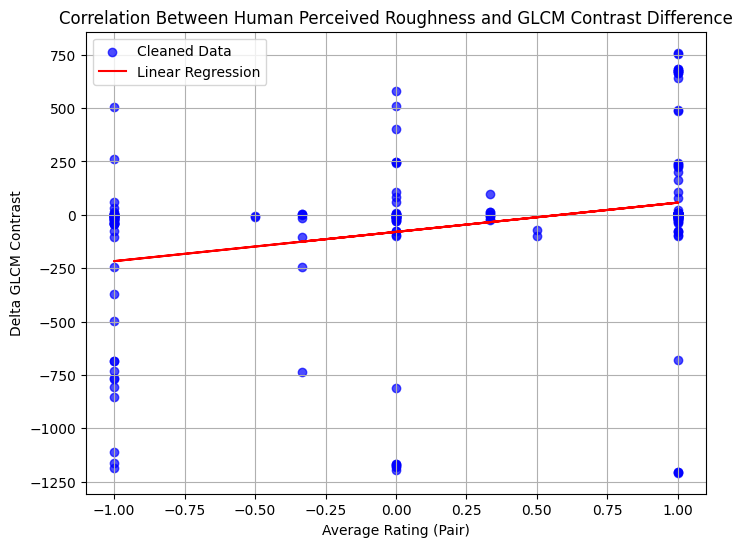

In [39]:
from sklearn.linear_model import LinearRegression

# Reshape x_clean for sklearn
x_clean_reshaped = x_clean.reshape(-1, 1)

# Fit linear regression
linreg = LinearRegression()
linreg.fit(x_clean_reshaped, y_clean)

# Predict values for regression line
y_pred_lin = linreg.predict(x_clean_reshaped)

# Plot cleaned data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(x_clean, y_clean, alpha=0.7, color='blue', label='Cleaned Data')
plt.plot(x_clean, y_pred_lin, color='red', label='Linear Regression')
plt.xlabel('Average Rating (Pair)')
plt.ylabel('Delta GLCM Contrast')
plt.title('Correlation Between Human Perceived Roughness and GLCM Contrast Difference')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from sklearn.metrics import r2_score

# Calculate R^2 for the linear regression fit (x_clean vs. y_pred_lin)
r2 = r2_score(y_clean, y_pred_lin)
print(f"R^2 of the graph above: {r2:.4f}")

R^2 of the graph above: 0.0774


Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'
Error: [Errno 2] No such file or directory: 'C:\\Users\\ndian\\Side-Projects\\UIC_BIODESIGN\\data\\RRS_Sample_Images\\index'


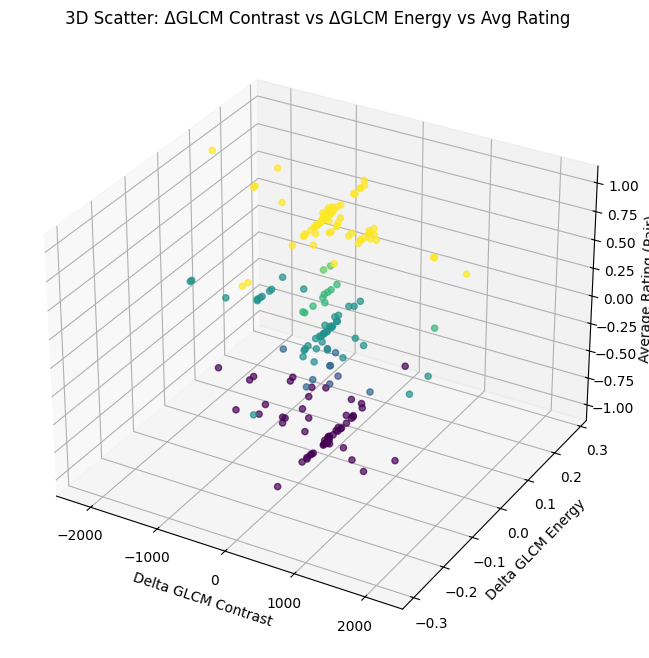

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare data for 3D plot
x_3d = []  # delta GLCM contrast
y_3d = []  # delta GLCM energy
z_3d = []  # avg rating

for pair, data in ratings_map.items():
    avg_result = data.get('avg')
    if len(data.get('results', [])) < 2:
        continue
    contrast1 = img_feature_analysis.calculate_glcm_feature('../data/RRS_Sample_Images/' + pair[0], 'contrast')
    contrast2 = img_feature_analysis.calculate_glcm_feature('../data/RRS_Sample_Images/' + pair[1], 'contrast')
    energy1 = img_feature_analysis.calculate_glcm_feature('../data/RRS_Sample_Images/' + pair[0], 'energy')
    energy2 = img_feature_analysis.calculate_glcm_feature('../data/RRS_Sample_Images/' + pair[1], 'energy')
    if None in (contrast1, contrast2, energy1, energy2):
        continue
    delta_contrast = contrast2 - contrast1
    delta_energy = energy2 - energy1
    x_3d.append(delta_contrast)
    y_3d.append(delta_energy)
    z_3d.append(avg_result)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_3d, y_3d, z_3d, c=z_3d, cmap='viridis', alpha=0.7)
ax.set_xlabel('Delta GLCM Contrast')
ax.set_ylabel('Delta GLCM Energy')
ax.set_zlabel('Average Rating (Pair)')
ax.set_title('3D Scatter: ΔGLCM Contrast vs ΔGLCM Energy vs Avg Rating')
plt.show()

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# For linear regression
r2_lin = r2_score(x_clean, y_pred_lin)
mse_lin = mean_squared_error(x_clean, y_pred_lin)
mae_lin = mean_absolute_error(x_clean, y_pred_lin)

print(f"Linear Regression stats:")
print(f"R^2: {r2_lin:.4f}")
print(f"MSE: {mse_lin:.4f}")
print(f"MAE: {mae_lin:.4f}")

# For polynomial regression
r2_poly = r2_score(x_filtered, y_pred_poly)
mse_poly = mean_squared_error(x_filtered, y_pred_poly)
mae_poly = mean_absolute_error(x_filtered, y_pred_poly)

print(f"\nPolynomial Regression stats:")
print(f"R^2: {r2_poly:.4f}")
print(f"MSE: {mse_poly:.4f}")
print(f"MAE: {mae_poly:.4f}")

# For random forest regression (from cell 39)

rf_r2 = r2_score(y_true, y_pred_rf)
rf_mse = mean_squared_error(y_true, y_pred_rf)
rf_mae = mean_absolute_error(y_true, y_pred_rf)

print(f"\nRandom Forest Regression stats:")
print(f"R^2: {rf_r2:.4f}")
print(f"MSE: {rf_mse:.4f}")
print(f"MAE: {rf_mae:.4f}")

Linear Regression stats:
R^2: -24394.9234
MSE: 16435.4698
MAE: 107.5571

Polynomial Regression stats:
R^2: 0.0913
MSE: 0.6097
MAE: 0.6860


NameError: name 'y_pred_rf' is not defined

[-734.5248103068166, -810.086976268627, 11.297037594312572, -75.56216596181056, 2199.939416926623, 6.263583400106838, -1431.0634684798688, 1.5433903998517655, -7.72114478403541, 9.264535183887176, -368.6632762630148, -1.252788270757021, -19.333924575900966, 3.408822016608653, -11.162730526317112, -7.301182502838975, -26.604294615987758, -22.74274659250962, 3.8615480234781385, -25.060904216135995, -2194.860696531426, -2200.211376804702, 0.21937768080162368, -1202.7933548673054, -3.9324899110613245, 238.34611137978766, 201.20740675397366, 10.06468364553437, 3.742624143982681, 504.0310493679956, 9.33506398475498, 488.75653949444626, -19.914140561406178, 165.00879930882604, -6.009974689662181, -30.79567786985496, -25.280281896937616, 77.63273449575203, 1652.840604428743, -6.628387006512006, -9.808465131512007, 1656.9523837759752, 60.37276788126766, 23.309013151746385, 7.943361680275743, 6.155558206226477, 245.25916703073392, 1.7223531302728292, -1166.2047153142344, 9.202302096052097, -1164

In [ ]:
#

In [ ]:
#

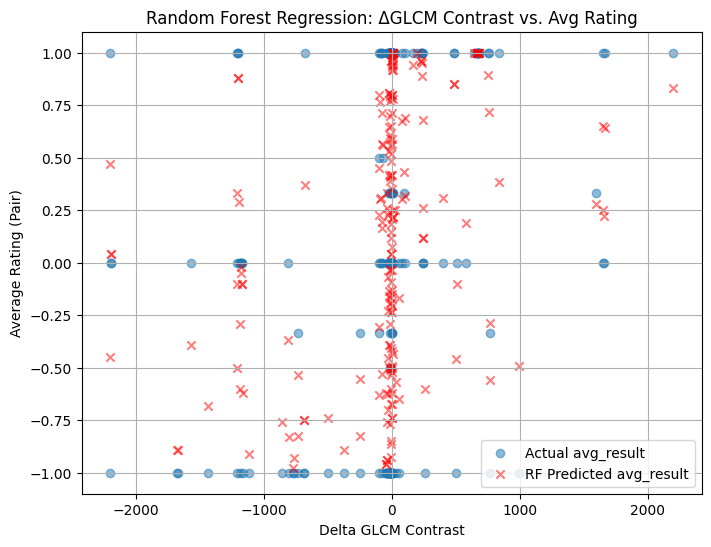

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fit a Random Forest Regressor to predict avg_result (y_true) from delta_contrast (X)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y_true)

# Predict values
y_pred_rf = rf.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(X, y_true, label='Actual avg_result', alpha=0.5)
plt.scatter(X, y_pred_rf, label='RF Predicted avg_result', alpha=0.5, color='red', marker='x')
plt.xlabel('Delta GLCM Contrast')
plt.ylabel('Average Rating (Pair)')
plt.title('Random Forest Regression: ΔGLCM Contrast vs. Avg Rating')
plt.legend()
plt.grid(True)
plt.show()